In [73]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [2]:
control_company = pd.read_csv('../data/control_group.csv', sep = ';')
test_company = pd.read_csv('../data/test_group.csv', sep = ';')

In [3]:
control_company.columns = (
    control_company.columns.str.lower()
    .str.replace(r'^# of\s+', '', regex = True)
    .str.replace(r'[\[\]]', '', regex = True)
    .str.replace(' ', '_')
)
control_company.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_company.columns = (
    test_company.columns.str.lower()
    .str.replace(r'^# of\s+', '', regex = True)
    .str.replace(r'[\[\]]', '', regex = True)
    .str.replace(' ', '_')
)
test_company.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
is_broken_row = (
    control_company['spend_usd'].notna() & 
    control_company[['impressions', 'reach', 'website_clicks', 'purchase']].isna().all(axis = 1)
)

In [21]:
control_company = control_company[~is_broken_row]
control_company.head()

C:\Users\SWAG\AppData\Local\Temp\ipykernel_19716\3681386577.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control_company = control_company[~is_broken_row]


,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [35]:
avg_cpp_control = (control_company["spend_usd"].sum() / control_company["purchase"].sum())
avg_cpp_test = (test_company["spend_usd"].sum() / test_company["purchase"].sum())
print(f"Control CPP: ${avg_cpp_control:.2f}")
print(f"Test CPP: ${avg_cpp_test:.2f}")

Control CPP: $4.41
Test CPP: $4.92


In [36]:
conv_control = (control_company["purchase"].sum() / control_company["impressions"].sum()) * 100
conv_test = (test_company["purchase"].sum() / test_company["impressions"].sum()) * 100
print(f"Control Conversion: {conv_control:.2f}%")
print(f"Test Conversion: {conv_test:.2f}%")

Control Conversion: 0.48%
Test Conversion: 0.70%


In [38]:
control_conv = control_company["purchase"] / control_company["impressions"]
test_conv = test_company["purchase"] / test_company["impressions"]

In [49]:
t_stat, p_value = stats.ttest_ind(control_conv, test_conv, equal_var = False)

print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Разница статистически значима")
else:
    print("Разница не значима")

p-value: 0.002
Разница статистически значима


In [52]:
control_funnel = {
    'Impressions': control_company["impressions"].sum(),
    'Clicks': control_company["website_clicks"].sum(),
    'View Content': control_company["view_content"].sum(),
    'Add to Cart': control_company["add_to_cart"].sum(),
    'Purchase': control_company["purchase"].sum()
}

test_funnel = {
    'Impressions': test_company["impressions"].sum(),
    'Clicks': test_company["website_clicks"].sum(),
    'View Content': test_company["view_content"].sum(),
    'Add to Cart': test_company["add_to_cart"].sum(),
    'Purchase': test_company["purchase"].sum()

}

df_funnel = pd.DataFrame({
    'Control': control_funnel,
    'Test': test_funnel
})

df_funnel

,Control,Test
Impressions,3177233.0,2237544
Clicks,154303.0,180970
View Content,56370.0,55740
Add to Cart,37700.0,26446
Purchase,15161.0,15637


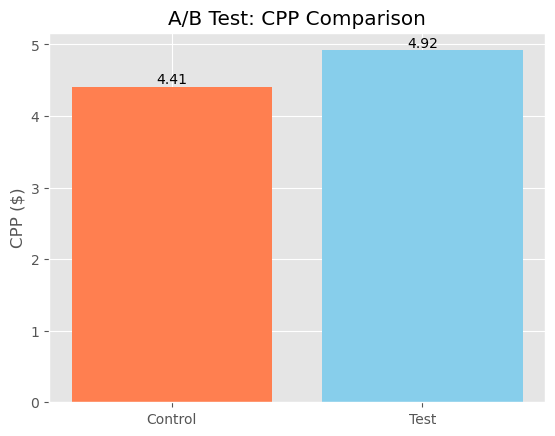

In [63]:
campaigns = ['Control', 'Test']
cpp_values = [avg_cpp_control, avg_cpp_test]

bars= plt.bar(campaigns, cpp_values, color = ['coral', 'skyblue'])
plt.ylabel('CPP ($)')
plt.title('A/B Test: CPP Comparison')
plt.bar_label(bars, fmt = '%.2f')
plt.show()



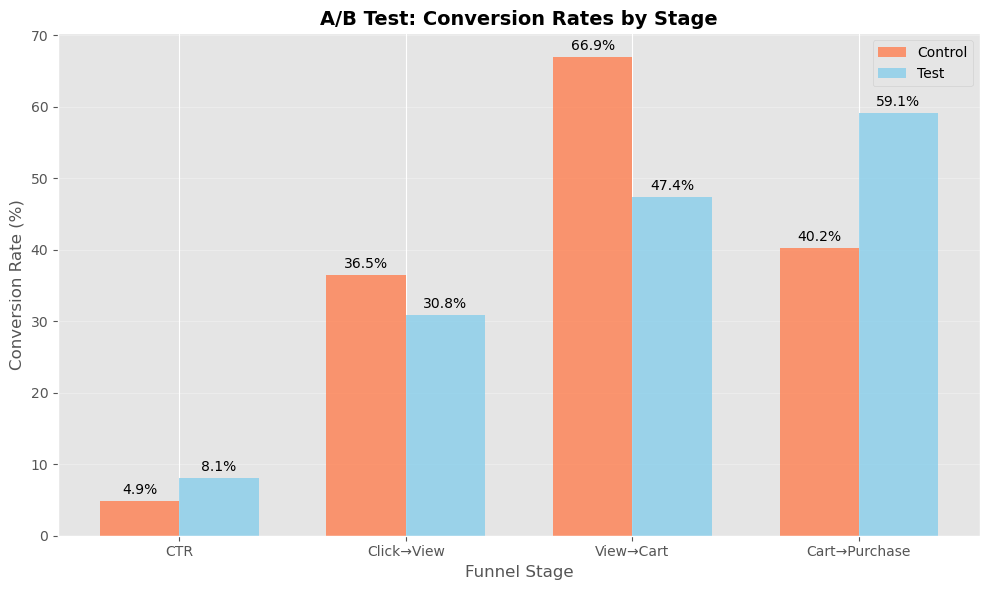

In [74]:
metrics = ['CTR', 'Click→View', 'View→Cart', 'Cart→Purchase']
control_vals = [4.86, 36.5, 66.9, 40.2]
test_vals = [8.09, 30.8, 47.4, 59.1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, control_vals, width, label='Control', color='coral', alpha=0.8)
bars2 = ax.bar(x + width/2, test_vals, width, label='Test', color='skyblue', alpha=0.8)

ax.set_ylabel('Conversion Rate (%)', fontsize=12)
ax.set_xlabel('Funnel Stage', fontsize=12)
ax.set_title('A/B Test: Conversion Rates by Stage', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)


ax.bar_label(bars1, fmt='%.1f%%', padding=3)
ax.bar_label(bars2, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()